In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# 1.Load Data

In [2]:
data = np.load("../my_comp_train_XY.npz")
X = data["X"]
y = data["y"]

# 2.Split train, valid and test data

In [3]:
X = X.reshape(X.shape[0], -1)
# split train, valid and test data(ratio 0.6:0.2:0.2)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=10)

In [4]:
# X_data 0 to 1 scaled
X_train_scaled = X_train / 255.0
X_valid_scaled = X_valid / 255.0
X_test_scaled = X_test / 255.0

In [6]:
print("Train data shape, X_train.shape:{} y_train.shape:{}".format(X_train_scaled.shape, y_train.shape))
print("Valid data shape, X_valid.shape:{} y_valid.shape:{}".format(X_valid_scaled.shape, y_valid.shape))
print("Test data shape, X_test.shape:{} y_test.shape:{}".format(X_test_scaled.shape, y_test.shape))

Train data shape, X_train.shape:(27285, 784) y_train.shape:(27285,)
Valid data shape, X_valid.shape:(9096, 784) y_valid.shape:(9096,)
Test data shape, X_test.shape:(9096, 784) y_test.shape:(9096,)


# 3.Classification

## 3-1.MLP base model

In [7]:
# input layer number of neuron
INPUT_SIZE = 784
# output layer number of neuron
OUTPUT_SIZE = 10
# output layer activation function
OUTPUT_LAYER_ACTIVATION_FUNC = "softmax"
# loss function
LOSS_FUNC = "sparse_categorical_crossentropy"

In [15]:
# Fix epochs and batch size
epochs = 30
batch_size = 32

In [16]:
# validation data
validation_data = (X_valid_scaled, y_valid)

In [17]:
# base model
mlp_clf_base = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[INPUT_SIZE]), no need (p303)
    keras.layers.Dense(300, activation="relu", input_shape=[INPUT_SIZE]),
    keras.layers.Dense(150, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(70, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(OUTPUT_SIZE, activation=OUTPUT_LAYER_ACTIVATION_FUNC),
])

In [18]:
mlp_clf_base.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_9 (Dense)              (None, 70)                7070      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                2130      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                310       
Total params: 305,260
Trainable params: 305,260
Non-trainable params: 0
________________________________________________

In [19]:
mlp_clf_base.compile(loss=LOSS_FUNC, metrics=["accuracy"], optimizer="Adam")

In [20]:
# early stopping callback
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=10)

In [21]:
# train model and accuracy evaluation with validation data
history = mlp_clf_base.fit(X_train_scaled, y_train, epochs=epochs,
                         batch_size=batch_size,
                         validation_data=validation_data,
                         callbacks=[early_stopping_cb])

Epoch 1/30
853/853 [==============================] - 3s 4ms/step - loss: 0.3308 - accuracy: 0.8981 - val_loss: 0.2016 - val_accuracy: 0.9303
Epoch 2/30
853/853 [==============================] - 3s 3ms/step - loss: 0.1343 - accuracy: 0.9595 - val_loss: 0.1429 - val_accuracy: 0.9581
Epoch 3/30
853/853 [==============================] - 3s 3ms/step - loss: 0.0933 - accuracy: 0.9716 - val_loss: 0.1124 - val_accuracy: 0.9665
Epoch 4/30
853/853 [==============================] - 3s 3ms/step - loss: 0.0705 - accuracy: 0.9790 - val_loss: 0.1343 - val_accuracy: 0.9639
Epoch 5/30
853/853 [==============================] - 3s 3ms/step - loss: 0.0596 - accuracy: 0.9823 - val_loss: 0.1090 - val_accuracy: 0.9690
Epoch 6/30
853/853 [==============================] - 4s 4ms/step - loss: 0.0519 - accuracy: 0.9845 - val_loss: 0.1192 - val_accuracy: 0.9686
Epoch 7/30
853/853 [==============================] - 4s 5ms/step - loss: 0.0380 - accuracy: 0.9876 - val_loss: 0.1197 - val_accuracy: 0.9671
Epoch 

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
train_loss, valid_loss = history.history["loss"], history.history["val_loss"]
train_acc, valid_acc = history.history["accuracy"], history.history["val_accuracy"]

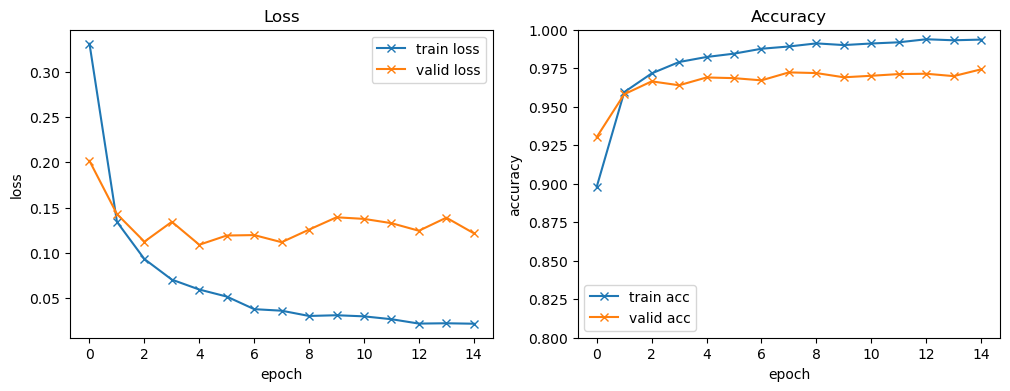

In [27]:
# plot loss and accuracy score with train and valid data along epoch

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(range(len(train_loss)), train_loss, "-x", label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, "-x", label="valid loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.title("Loss")

plt.subplot(122)
plt.plot(range(len(train_acc)), train_acc, "-x", label="train acc")
plt.plot(range(len(valid_acc)), valid_acc, "-x", label="valid acc")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.ylim([0.8, 1.0])
plt.legend()
plt.title("Accuracy")

plt.show()

### observation

epoch > 4 is over fitting

In [28]:
# evaluate accuracy score with test data
mlp_clf_base.evaluate(X_test_scaled, y_test)

285/285 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9723


[0.13608527183532715, 0.9722955226898193]